# 대출 이자 계산 알고리즘

## 용어표
- Principal: 원금
- Interest: 이자
- Interest Rate: 이자율

## 대출 상환 스케줄

### 원리금 균등상환
- 영문 표기: Amortized Loan | Equal payment Loan
- 상환 방식: 매달 동일한 금액을 원리금(원금 + 이자)으로 상환하는 방식
- 특징: 상환스케줄 초반에는 상환원금이 적고, 후반으로 갈수록 상환원금이 증가하는 구조
- 월할 이자 계산: 이자 계산시, 월별 일수 변동(28일, 30일, 31일)을 고려하지 않음
- 계산식: 대출잔액(회차별) * 연이자율 * (1/12)

### 원금 균등상환
- 영문 표기: Equal principal payment Loan
- 상환 방식: 매월 일정한 원금(대출금액을 대출기간으로 나눈값)을 상환하는 방식
- 특징: 상환 회차별 상환원금이 일정하나, 원리금은 상환 회차마다 상이함 / 원리금균등 상환방식보다 원금상환 속도가 빠르기 때문에 총 이자납입액이 적음
- 월별 이자 계산시, 통상 월별 일수(30일, 31일) 변동을 고려함
- 계산식: 대출잔액(회차별) * 연이자율 * (사용일수/365)

### 만기일시상환
- 영문 표기: Interest-Only Loan
- 상환 방식: 대출만기깢 이자만 상환하고 원금은 만기시점에 일시에 갚는 방식
- 특징: 월별이자 계산시, 월별 일수(30일, 31일) 변동을 고려함
- 계산식: 대출잔액 * 연이자율 * (사용일수/365)

## Function

In [1]:
import matplotlib.pyplot as plt

def graph_function(df):
    _, ax = plt.subplots(figsize=(10, 6))

    df[:-1][['Principal', 'Interest']].plot(kind='bar', stacked=True, ax=ax)

    ax.set_title('Principal and Interest Payments Over Time')
    ax.set_xlabel('Period')
    ax.set_ylabel('Amount')
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df['Payment Date'], rotation=45, ha='right')

    plt.legend(['Principal', 'Interest'])
    plt.tight_layout()

    plt.show()

## 원리금균등분할상환 알고리즘

In [2]:
import math
from datetime import datetime
from dateutil.relativedelta import relativedelta

import pandas as pd

def calculate_equal_payment(
        start_date: datetime,
        principal: int,
        expiration_months: int,
        annual_interest_rate: str = 0.28,
        cycle: str = ['month', '4week', '2week', 'week']
    ) -> pd.DataFrame:
    
    total_period = 0
    cycle_cnt = 0

    expire_date = start_date + relativedelta(months=expiration_months)
    total_days = (expire_date - start_date).days

    if cycle == 'month':
        cycle_cnt = 12
        total_period = expiration_months
    elif cycle == '4week':
        cycle_cnt = 13
        total_period = math.ceil(total_days / 28)
    elif cycle == '2week':
        cycle_cnt = 26
        total_period = math.ceil(total_days / 14)
    elif cycle == 'week':
        cycle_cnt = 52
        total_period = math.ceil(total_days / 7)

    period_interest_rate = ((1 + annual_interest_rate / cycle_cnt) ** total_period) - 1
    amount_per_period = round((principal*annual_interest_rate/cycle_cnt * (1+annual_interest_rate/cycle_cnt) ** total_period) / period_interest_rate)

    schedule = []
    current_date = start_date

    total_principal_payment = 0
    total_interest_payment = 0
    total_principal_n_interest = 0
    
    for period in range(1, total_period+1):
        interest_payment = round(principal * annual_interest_rate / cycle_cnt)
        principal_payment = round(amount_per_period - interest_payment)
        principal -= principal_payment

        total_principal_payment += principal_payment
        total_interest_payment += interest_payment
        total_principal_n_interest += amount_per_period

        schedule.append({
            'Period': period,
            'Payment Date': current_date.strftime('%Y-%m-%d (%A)'),
            'Principal': principal_payment,
            'Interest': interest_payment,
            'Total': amount_per_period,
            'Remaining Balance': round(principal),
        })

        if cycle == 'month':
            current_date += relativedelta(months=1)
        elif cycle == '4week':
            current_date += relativedelta(weeks=4)
        elif cycle == '2week':
            current_date += relativedelta(weeks=2)
        elif cycle == 'week':
            current_date += relativedelta(weeks=1)

    schedule.append({
        'Period': 'Total',
        'Payment Date': '-',
        'Principal': total_principal_payment,
        'Interest': total_interest_payment,
        'Total': total_principal_n_interest,
        'Remaining Balance': '-',
    })

    df = pd.DataFrame(schedule)
    # df = df.style.hide(axis='index')
    return df

### 예제

In [3]:
from datetime import datetime
start_date = datetime(2024, 7, 17)
principal = 1000000
expiration_months = 18
annual_interest_rate = 0.28

In [4]:
# 한달 단위
df = calculate_equal_payment(start_date, principal, expiration_months, annual_interest_rate, cycle='month')

# 4주 단위
# df = calculate_equal_payment(start_date, principal, expiration_months, annual_interest_rate, cycle='4week')

# 2주 단위
# df = calculate_equal_payment(start_date, principal, expiration_months, annual_interest_rate, cycle='2week')

# 1주 단위
# df = calculate_equal_payment(start_date, principal, expiration_months, annual_interest_rate, cycle='week')

df

,Period,Payment Date,Principal,Interest,Total,Remaining Balance
0,1,2024-07-17 (Wednesday),45340,23333,68673,954660
1,2,2024-08-17 (Saturday),46398,22275,68673,908262
2,3,2024-09-17 (Tuesday),47480,21193,68673,860782
3,4,2024-10-17 (Thursday),48588,20085,68673,812194
4,5,2024-11-17 (Sunday),49722,18951,68673,762472
5,6,2024-12-17 (Tuesday),50882,17791,68673,711590
6,7,2025-01-17 (Friday),52069,16604,68673,659521
7,8,2025-02-17 (Monday),53284,15389,68673,606237
8,9,2025-03-17 (Monday),54527,14146,68673,551710
9,10,2025-04-17 (Thursday),55800,12873,68673,495910


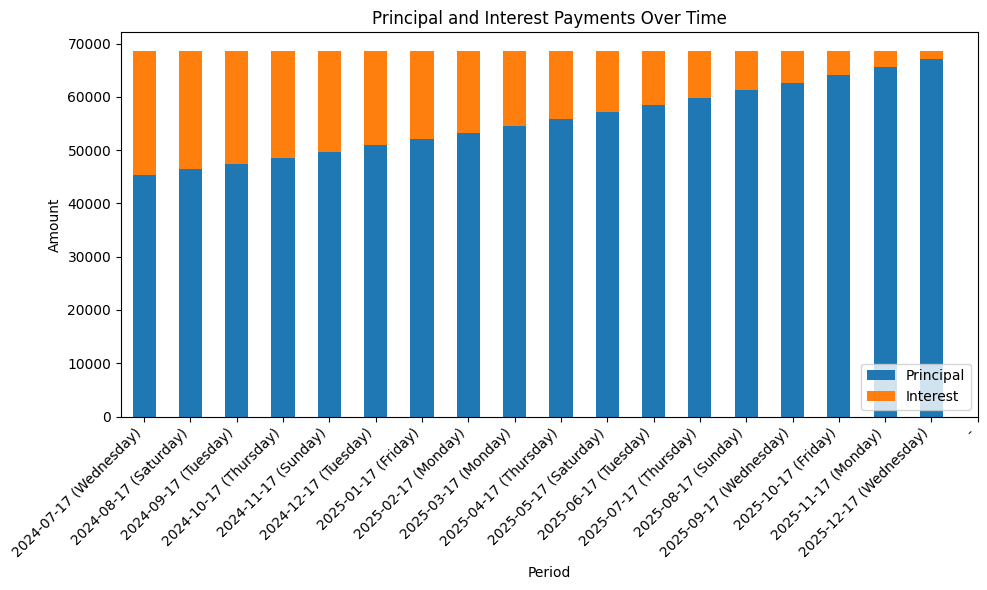

In [5]:
graph_function(df)

## 원금균등분할상환 알고리즘

In [6]:
import math
from datetime import datetime
from dateutil.relativedelta import relativedelta

import pandas as pd

def calculate_equal_principal_payment(
        start_date: datetime,
        principal: int,
        expiration_months: int,
        annual_interest_rate: str = 0.28,
        cycle: str = ['month', '4week', '2week', 'week']
    ) -> pd.DataFrame:
    
    total_period = 0
    cycle_cnt = 0

    expire_date = start_date + relativedelta(months=expiration_months)
    total_days = (expire_date - start_date).days

    if cycle == 'month':
        cycle_cnt = 12
        total_period = expiration_months
    elif cycle == '4week':
        cycle_cnt = 13
        total_period = math.ceil(total_days / 28)
    elif cycle == '2week':
        cycle_cnt = 26
        total_period = math.ceil(total_days / 14)
    elif cycle == 'week':
        cycle_cnt = 52
        total_period = math.ceil(total_days / 7)

    period_interest_rate = annual_interest_rate / cycle_cnt

    schedule = []
    current_date = start_date

    total_principal_payment = 0
    total_interest_payment = 0
    total_principal_n_interest = 0
    
    principal_payment = round(principal / total_period)
    for period in range(1, total_period+1):
        interest_payment = round(principal * period_interest_rate)
        amount_per_period = principal_payment + interest_payment
        principal -= principal_payment

        total_principal_payment += principal_payment
        total_interest_payment += interest_payment
        total_principal_n_interest += amount_per_period

        schedule.append({
            'Period': period,
            'Payment Date': current_date.strftime('%Y-%m-%d (%A)'),
            'Principal': principal_payment,
            'Interest': interest_payment,
            'Total': amount_per_period,
            'Remaining Balance': round(principal),
        })

        if cycle == 'month':
            current_date += relativedelta(months=1)
        elif cycle == '4week':
            current_date += relativedelta(weeks=4)
        elif cycle == '2week':
            current_date += relativedelta(weeks=2)
        elif cycle == 'week':
            current_date += relativedelta(weeks=1)

    schedule.append({
        'Period': 'Total',
        'Payment Date': '-',
        'Principal': total_principal_payment,
        'Interest': total_interest_payment,
        'Total': total_principal_n_interest,
        'Remaining Balance': '-',
    })

    df = pd.DataFrame(schedule)
    # df = df.style.hide(axis='index')
    return df

### 예제

In [7]:
from datetime import datetime
start_date = datetime(2024, 7, 17)
principal = 1000000
expiration_months = 22
annual_interest_rate = 0.28

In [8]:
# 한달 단위
df = calculate_equal_principal_payment(start_date, principal, expiration_months, annual_interest_rate, cycle='month')

# 4주 단위
# df = calculate_equal_principal_payment(start_date, principal, expiration_months, annual_interest_rate, cycle='4week')

# 2주 단위
# df = calculate_equal_principal_payment(start_date, principal, expiration_months, annual_interest_rate, cycle='2week')

# 1주 단위
# df = calculate_equal_principal_payment(start_date, principal, expiration_months, annual_interest_rate, cycle='week')

df

,Period,Payment Date,Principal,Interest,Total,Remaining Balance
0,1,2024-07-17 (Wednesday),45455,23333,68788,954545
1,2,2024-08-17 (Saturday),45455,22273,67728,909090
2,3,2024-09-17 (Tuesday),45455,21212,66667,863635
3,4,2024-10-17 (Thursday),45455,20151,65606,818180
4,5,2024-11-17 (Sunday),45455,19091,64546,772725
5,6,2024-12-17 (Tuesday),45455,18030,63485,727270
6,7,2025-01-17 (Friday),45455,16970,62425,681815
7,8,2025-02-17 (Monday),45455,15909,61364,636360
8,9,2025-03-17 (Monday),45455,14848,60303,590905
9,10,2025-04-17 (Thursday),45455,13788,59243,545450


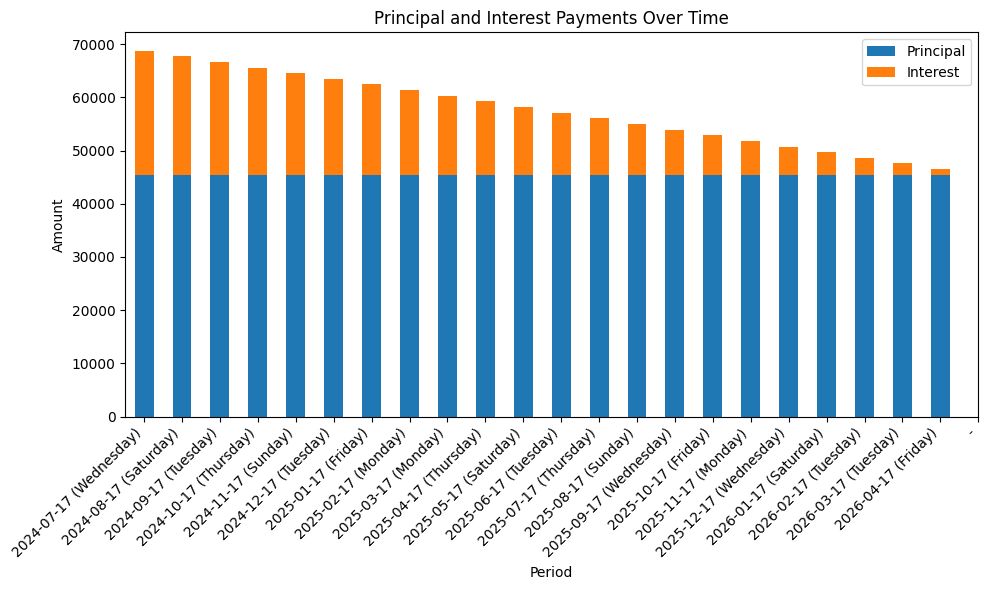

In [9]:
graph_function(df)

## 만기일시상환 알고리즘

In [10]:
import math
from datetime import datetime
from dateutil.relativedelta import relativedelta

import pandas as pd

def calculate_bullet_payment(
        start_date: datetime,
        principal: int,
        expiration_months: int,
        annual_interest_rate: str = 0.28,
        cycle: str = ['month', '4week', '2week', 'week']
    ) -> pd.DataFrame:
    
    total_period = 0
    cycle_cnt = 0

    expire_date = start_date + relativedelta(months=expiration_months)
    total_days = (expire_date - start_date).days

    if cycle == 'month':
        cycle_cnt = 12
        total_period = expiration_months
    elif cycle == '4week':
        cycle_cnt = 13
        total_period = math.ceil(total_days / 28)
    elif cycle == '2week':
        cycle_cnt = 26
        total_period = math.ceil(total_days / 14)
    elif cycle == 'week':
        cycle_cnt = 52
        total_period = math.ceil(total_days / 7)

    period_interest_rate = annual_interest_rate / cycle_cnt

    schedule = []
    current_date = start_date

    total_principal_payment = 0
    total_interest_payment = 0
    total_principal_n_interest = 0
    
    for period in range(1, total_period+1):
        interest_payment = round(principal * period_interest_rate)
        amount_per_period = interest_payment

        total_interest_payment += interest_payment
        total_principal_n_interest += amount_per_period

        schedule.append({
            'Period': period,
            'Payment Date': current_date.strftime('%Y-%m-%d (%A)'),
            'Principal': 0,
            'Interest': interest_payment,
            'Total': amount_per_period,
            'Remaining Balance': round(principal),
        })

        if cycle == 'month':
            current_date += relativedelta(months=1)
        elif cycle == '4week':
            current_date += relativedelta(weeks=4)
        elif cycle == '2week':
            current_date += relativedelta(weeks=2)
        elif cycle == 'week':
            current_date += relativedelta(weeks=1)

    total_principal_payment = principal
    schedule.append({
        'Period': 'Total',
        'Payment Date': '-',
        'Principal': total_principal_payment,
        'Interest': total_interest_payment,
        'Total': total_principal_n_interest + principal,
        'Remaining Balance': '-',
    })

    df = pd.DataFrame(schedule)
    # df = df.style.hide(axis='index')
    return df

### 예제

In [11]:
from datetime import datetime
start_date = datetime(2024, 7, 17)
cycles = ['month', '4week', '2week', 'week']
principal = 1000000
expiration_months = 22
annual_interest_rate = 0.28

In [12]:
# 한달 단위
df = calculate_bullet_payment(start_date, principal, expiration_months, annual_interest_rate, cycle='month')

# 4주 단위
# df = calculate_bullet_payment(start_date, principal, expiration_months, annual_interest_rate, cycle='4week')

# 2주 단위
# df = calculate_bullet_payment(start_date, principal, expiration_months, annual_interest_rate, cycle='2week')

# 1주 단위
# df = calculate_bullet_payment(start_date, principal, expiration_months, annual_interest_rate, cycle='week')

df

,Period,Payment Date,Principal,Interest,Total,Remaining Balance
0,1,2024-07-17 (Wednesday),0,23333,23333,1000000
1,2,2024-08-17 (Saturday),0,23333,23333,1000000
2,3,2024-09-17 (Tuesday),0,23333,23333,1000000
3,4,2024-10-17 (Thursday),0,23333,23333,1000000
4,5,2024-11-17 (Sunday),0,23333,23333,1000000
5,6,2024-12-17 (Tuesday),0,23333,23333,1000000
6,7,2025-01-17 (Friday),0,23333,23333,1000000
7,8,2025-02-17 (Monday),0,23333,23333,1000000
8,9,2025-03-17 (Monday),0,23333,23333,1000000
9,10,2025-04-17 (Thursday),0,23333,23333,1000000


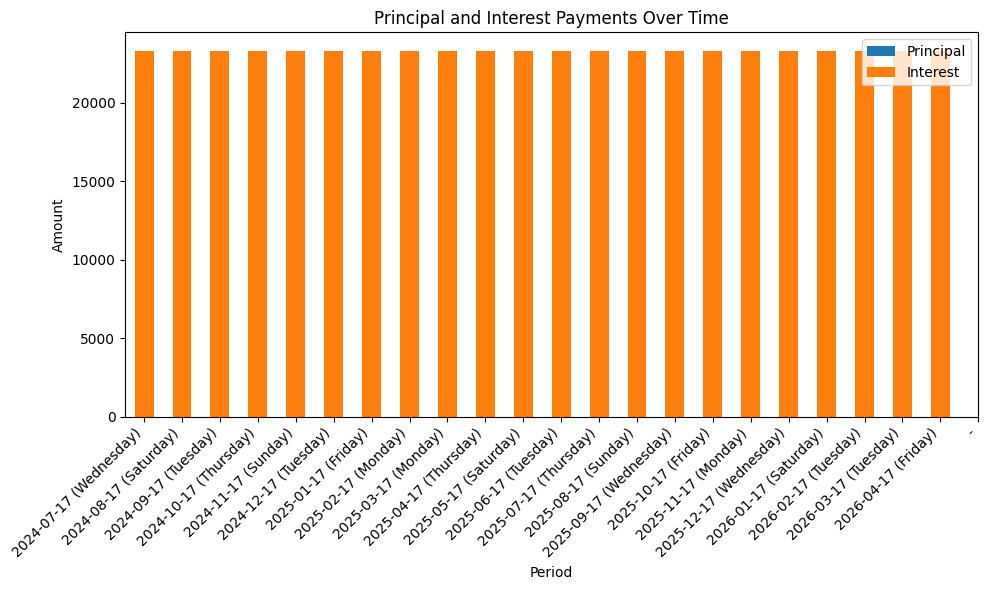

In [13]:
graph_function(df)